In [4]:
import numpy as np
import pandas as pd
import tushare as ts
import matplotlib.pyplot as plt

In [5]:
trading_data = ts.get_k_data('000650', start='2017-01-01', end='2018-03-11')
trading_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 287
Data columns (total 7 columns):
date      288 non-null object
open      288 non-null float64
close     288 non-null float64
high      288 non-null float64
low       288 non-null float64
volume    288 non-null float64
code      288 non-null object
dtypes: float64(5), object(2)
memory usage: 18.0+ KB


In [6]:
trading_data['date'] = trading_data['date'].astype(np.datetime64)
trading_data.set_index('date', inplace=True)
trading_data.head()

/home/tom/anaconda3/envs/StatsEnv/lib/python3.6/site-packages/pandas/core/internals.py:3462: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


,open,close,high,low,volume,code
date,,,,,,
2017-01-03,6.951,6.96,6.970,6.921,90005.0,000650
2017-01-04,6.970,7.01,7.029,6.951,99681.0,000650
2017-01-05,7.039,7.00,7.049,6.980,99458.0,000650
2017-01-06,6.980,6.96,7.000,6.960,72305.0,000650
2017-01-09,6.931,6.98,6.980,6.931,58303.0,000650


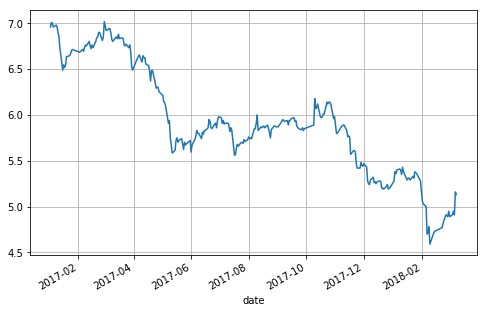

In [7]:
trading_data['close'].plot(grid=True, figsize=(8, 5))

In [8]:
trading_data['5d'] = np.round(trading_data['close'].rolling(window=5, center=False).mean(), 2)
trading_data['42d'] = np.round(trading_data['close'].rolling(window=42, center=False).mean(), 2)
trading_data['252d'] = np.round(trading_data['close'].rolling(window=252, center=False).mean(), 2)

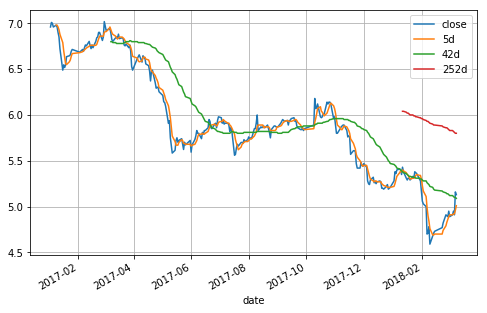

In [9]:
trading_data[['close', '5d', '42d', '252d']].plot(grid=True, figsize=(8, 5))

In [10]:
trading_data['5-42'] = trading_data['5d'] - trading_data['42d']
trading_data['42-252'] = trading_data['42d'] - trading_data['252d']
trading_data.tail()

,open,close,high,low,volume,code,5d,42d,252d,5-42,42-252
date,,,,,,,,,,,
2018-03-05,4.89,4.91,4.92,4.89,23031.0,000650,4.91,5.12,5.83,-0.21,-0.71
2018-03-06,4.92,4.95,4.97,4.91,48562.0,000650,4.92,5.11,5.82,-0.19,-0.71
2018-03-07,4.95,4.91,4.96,4.90,32435.0,000650,4.92,5.10,5.81,-0.18,-0.71
2018-03-08,4.91,5.16,5.28,4.90,246776.0,000650,4.96,5.10,5.80,-0.14,-0.70
2018-03-09,5.15,5.13,5.16,5.07,115696.0,000650,5.01,5.09,5.80,-0.08,-0.71


In [11]:
SD = 0
trading_data['s_regime'] = np.where(trading_data['5-42'] > SD, 1, 0)
trading_data['s_regime'] = np.where(trading_data['5-42'] < SD, -1, trading_data['s_regime'])
trading_data['l_regime'] = np.where(trading_data['42-252'] > SD, 1, 0)
trading_data['l_regime'] = np.where(trading_data['42-252'] < SD, -1, trading_data['s_regime'])
trading_data['s_regime'].value_counts()

-1    155
 1     87
 0     46
Name: s_regime, dtype: int64

(-1.1, 1.1)

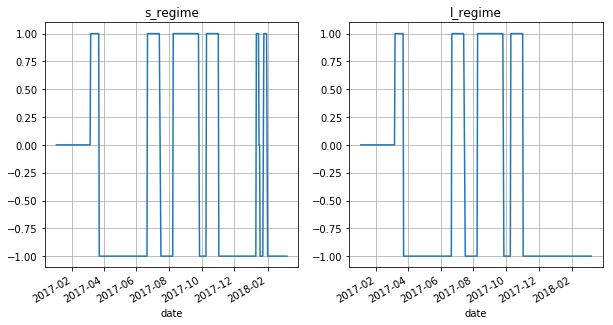

In [14]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('s_regime')
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('l_regime')
trading_data['s_regime'].plot(grid=True, ax = ax1)
trading_data['l_regime'].plot(grid=True, ax = ax2)
plt.ylim([-1.1, 1.1])

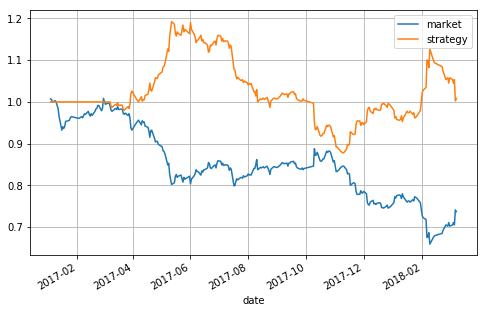

In [16]:
trading_data['market'] = np.log(trading_data['close'] / trading_data['close'].shift(1))
trading_data['strategy'] = trading_data['l_regime'].shift(1) * trading_data['market']
trading_data[['market', 'strategy']].cumsum().apply(np.exp).plot(grid=True, figsize=(8, 5))

int